In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/BrentOilPrices.csv')

In [3]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [4]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\HP\AppData\Local\Temp\ipykernel_21524\936118274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [6]:
df['Date'].min()

Timestamp('1987-05-20 00:00:00')

In [7]:
df["Date"].max()

Timestamp('2022-11-14 00:00:00')

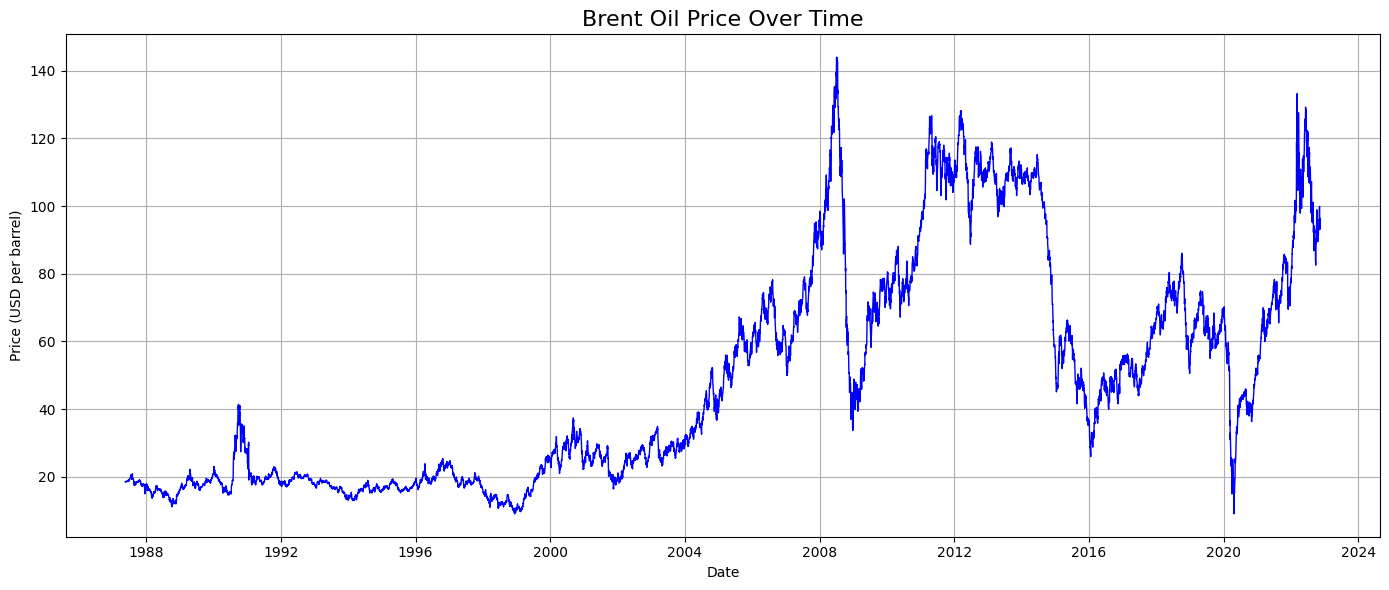

In [8]:
df = df.sort_values('Date')
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], color='blue', linewidth=1)
plt.title('Brent Oil Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
event_df = pd.read_csv("../data/oil_market_key_events.csv")

In [10]:
event_df.head(16)

,Date,Event,Category,Description
0,1973-10-16,Arab Oil Embargo,OPEC Embargo,OAPEC imposed embargo leading to ~300% price rise
1,1979-01-01,Iranian Revolution,Geopolitical,Iranian coup caused oil prices to surge from ~...
2,1990-08-02,Iraqi Invasion of Kuwait,Geopolitical,Gulf War triggered Brent rise from ~$17 to ~$36
3,2001-09-11,9/11 Attacks,Geopolitical,Terror event triggered economic slowdown and o...
4,2003-03-20,U.S. Invasion of Iraq,Geopolitical,"Removal of 2.5 mbpd disrupted market, prices s..."
5,2008-06-27,Libya Conflict & OPEC warnings,Conflict/OPEC,Brent soared to $141+ amid supply threat
6,2020-03-08,Russia–Saudi Oil Price War,OPEC+ Dispute,Breakdown in OPEC+ cuts; prices collapsed 65%
7,2020-04-20,COVID-19 Demand Collapse,Demand Shock,Brent briefly went negative on extreme oversupply
8,2021-07-18,Saudi–UAE OPEC+ Dispute Resolved,OPEC Negotiation,UAE production block resolved; output raised ~...
9,2022-02-24,Russia–Ukraine War & Sanctions,Geopolitical,Conflict and sanctions triggered >10% price jump


In [11]:
df.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


In [12]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


In [13]:
adf_test(df["Price"])

Results of Dickey-Fuller Test:
Test Statistic                   -1.993856
p-value                           0.289274
#Lags Used                       29.000000
Number of Observations Used    8981.000000
Critical Value (1%)              -3.431078
Critical Value (5%)              -2.861862
Critical Value (10%)             -2.566941
dtype: float64


* p value is grater than 0.05 which implies the model is nnot stationary

In [17]:
df['log_return'] = np.log(df['Price']) - np.log(df['Price'].shift(1))

In [18]:
df.head()

,Date,Price,log_return
0,1987-05-20,18.63,NaN
1,1987-05-21,18.45,-0.009709
2,1987-05-22,18.55,0.005405
3,1987-05-25,18.60,0.002692
4,1987-05-26,18.63,0.001612


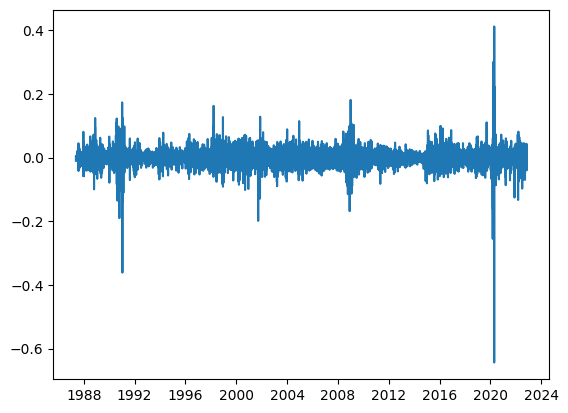

In [20]:
plt.plot( df["Date"] , df["log_return"])